This notebook explores Chicago Crime public dataset (bigquery-public-data.chicago_crime.crime)

In [3]:
query = """
SELECT count(arrest) FROM `bigquery-public-data.chicago_crime.crime` where arrest IS true 
"""

In [4]:
# Call BigQuery and examine in dataframe
import google.datalab.bigquery as bq
df = bq.Query(query + " LIMIT 100").execute().result().to_dataframe()


In [10]:
print("There were " + str(df.at[0,"f0_"]) + " arrests in Chicago")

There were 1874936 arrests in Chicago


Chicago coordinates are: latitude 41.8781° N, longitude 87.6298° W

In [ ]:
#example row


I create a table with ~ 1/5 of data :
SELECT * FROM `bigquery-public-data.chicago_crime.crime` 
where MOD(unique_key, 5) = 0


In [5]:
query = """
SELECT * FROM `ml-sme-223918.bqml_tutorial_us.chicago_crime_subset` 
"""

In [6]:
import google.datalab.bigquery as bq
df = bq.Query(query + " LIMIT 10000").execute().result().to_dataframe()

In [4]:
df.describe()

,unique_key,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude
count,1.000000e+04,10000.000000,10000.000000,9094.000000,9093.000000,9.880000e+03,9.880000e+03,10000.000000,9880.000000,9880.000000
mean,6.019879e+06,957.668400,8.809300,25.222784,37.324645,1.169884e+06,1.862125e+06,2007.964600,41.777162,-87.652792
std,2.959119e+06,624.775001,5.129304,12.797437,17.621808,1.009025e+04,3.898737e+04,4.846122,0.107122,0.036301
min,6.400000e+02,512.000000,5.000000,2.000000,3.000000,1.145015e+06,1.818775e+06,2001.000000,41.658132,-87.743523
25%,3.354052e+06,522.000000,5.000000,9.000000,30.000000,1.162321e+06,1.828462e+06,2004.000000,41.684619,-87.679737
50%,5.864905e+06,531.000000,5.000000,25.000000,49.000000,1.173140e+06,1.835508e+06,2007.000000,41.703900,-87.641880
75%,8.407878e+06,1033.000000,10.000000,34.000000,53.000000,1.178061e+06,1.888487e+06,2011.000000,41.849705,-87.623786
max,1.152740e+07,2323.000000,19.000000,48.000000,56.000000,1.188194e+06,1.932093e+06,2018.000000,41.969159,-87.586439


I observe that latitude is between (41.658132, 41.969159)
and longitude is between (-87.743523, -87.586439)

Also I see that year is between 2001 and 2018

In [6]:
df.head()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,3045,HL177967,2005-02-12 20:47:00,007XX E 103RD ST,0110,HOMICIDE,FIRST DEGREE MURDER,RETAIL STORE,True,False,...,9.0,50.0,01A,1182951.0,1836828.0,2005,2015-08-17 15:03:40,41.707456,-87.605637,"(41.707455731, -87.605637491)"
1,3205,HL435664,2005-06-21 21:28:00,103XX S INDIANA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,9.0,49.0,01A,1179414.0,1836239.0,2005,2015-08-17 15:03:40,41.705921,-87.618608,"(41.705920727, -87.618607847)"
2,20900,HW295447,2013-05-29 15:11:00,000XX W 107TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,34.0,49.0,01A,1177693.0,1834013.0,2013,2015-08-17 15:03:40,41.699851,-87.624977,"(41.699851294, -87.624977038)"
3,1710710,G513455,2001-08-27 23:55:00,104XX S STATE ST,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,False,False,...,NaN,NaN,02,1178136.0,1835744.0,2001,2015-08-17 15:03:40,41.704591,-87.623303,"(41.70459139, -87.623302709)"
4,11363170,JB327133,2018-06-29 00:44:13,002XX W 104TH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,34.0,49.0,02,1176571.0,1835979.0,2018,2018-07-06 15:55:18,41.705272,-87.629026,"(41.705271529, -87.629026445)"


I see in BigQuery:
Table size 271.74 MB

Number of rows 1,353,959

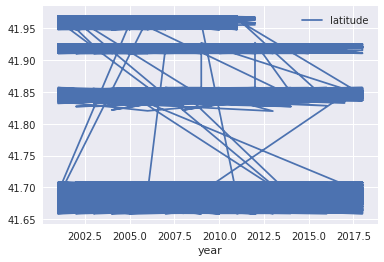

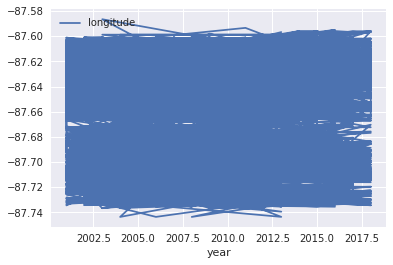

In [6]:
df.plot(x='year', y='latitude')
df.plot(x='year', y='longitude')

I see a lot of crime activity happening between 41.66 : 41.71 latitude in Chicago.

In [12]:
print(df['location'][0])

(41.707455731, -87.605637491)


In [13]:
print(df['location'])

0       (41.707455731, -87.605637491)
1       (41.705920727, -87.618607847)
2       (41.699851294, -87.624977038)
3        (41.70459139, -87.623302709)
4       (41.705271529, -87.629026445)
5       (41.707464272, -87.605252859)
6       (41.706936355, -87.623514952)
7       (41.707139627, -87.625325518)
8       (41.707203646, -87.606566877)
9       (41.703514283, -87.619985783)
10      (41.707455731, -87.605637491)
11      (41.702612409, -87.624584199)
12       (41.70252359, -87.622201235)
13       (41.70732639, -87.612985394)
14      (41.702798418, -87.616082701)
15      (41.702741406, -87.614863897)
16      (41.707180296, -87.620362752)
17        (41.7030247, -87.620694297)
18      (41.706094197, -87.627135112)
19       (41.70344512, -87.629240464)
20      (41.701346427, -87.616043909)
21      (41.703449284, -87.629024359)
22      (41.699862158, -87.624068789)
23      (41.703511834, -87.620033416)
24      (41.707455731, -87.605637491)
25      (41.703745084, -87.608191486)
26        (4

In [14]:
for x in df['location'][0]:
  print(x)

(
4
1
.
7
0
7
4
5
5
7
3
1
,
 
-
8
7
.
6
0
5
6
3
7
4
9
1
)


In [15]:
print(df['location'][0].find(","))

13


so it's a string

In [14]:
import copy
df2=copy.deepcopy(df)

https://docs.python.org/2/library/copy.html

Now, considering first element is (41.707455731, -87.605637491)

In [8]:
print(df2['location'][0][8:13])

55731


In [21]:
print(len(df2['location'][0]))

29


In [24]:
print(df2['location'][0][23:28])

37491


In [25]:
df2['location'][0][8:13]="00000"
print(df2['location'][0])

TypeError: 'newstr' object does not support item assignment

In [27]:
for index, row in df2.iterrows():
  print(row)
  print(row['location'])
  break


unique_key                                       3045
case_number                                  HL177967
date                              2005-02-12 20:47:00
block                                007XX E 103RD ST
iucr                                             0110
primary_type                                 HOMICIDE
description                       FIRST DEGREE MURDER
location_description                     RETAIL STORE
arrest                                           True
domestic                                        False
beat                                              512
district                                            5
ward                                                9
community_area                                     50
fbi_code                                          01A
x_coordinate                              1.18295e+06
y_coordinate                              1.83683e+06
year                                             2005
updated_on                  

In [30]:
for index, row in df2.iterrows():
  print(row['location'])
  tmp = row['location'][0:8] + "00000" + row['location'][13:23] + "00000)"
  print(tmp)
  print(row['location'])
  row['location'] = tmp
  print(row['location'])
  break

(41.707455731, -87.605637491)
(41.707400000, -87.605600000)
(41.707455731, -87.605637491)
(41.707400000, -87.605600000)


In [16]:
for index, row in df2.iterrows():
  try:
    tmp = row['location'][0:8] + "00000" + row['location'][13:23] + "00000)"
    row['location'] = tmp
  except TypeError:
    print(row)
print(df2.head())

unique_key                            1997070
case_number                          HH199377
date                      2002-02-20 23:19:53
block                          0000X E 105 ST
iucr                                     0320
primary_type                          ROBBERY
description             STRONGARM - NO WEAPON
location_description                   STREET
arrest                                  False
domestic                                False
beat                                      512
district                                    5
ward                                      NaN
community_area                            NaN
fbi_code                                   03
x_coordinate                              NaN
y_coordinate                              NaN
year                                     2002
updated_on                2016-02-04 06:33:39
latitude                                  NaN
longitude                                 NaN
location                          

unique_key                              7065565
case_number                            HR472787
date                        2009-08-08 18:09:00
block                      023XX S ST LOUIS AVE
iucr                                       1370
primary_type                    CRIMINAL DAMAGE
description             TO FIRE FIGHT.APP.EQUIP
location_description                   SIDEWALK
arrest                                     True
domestic                                  False
beat                                       1024
district                                     10
ward                                         22
community_area                               30
fbi_code                                     14
x_coordinate                                NaN
y_coordinate                                NaN
year                                       2009
updated_on                  2015-08-17 15:03:40
latitude                                    NaN
longitude                               

unique_key                                     6356545
case_number                                   HP416051
date                               2008-06-25 17:10:00
block                               031XX S PULASKI RD
iucr                                              2012
primary_type                                 NARCOTICS
description                       MANU/DELIVER:COCAINE
location_description    PARKING LOT/GARAGE(NON.RESID.)
arrest                                            True
domestic                                         False
beat                                              1031
district                                            10
ward                                                22
community_area                                      30
fbi_code                                            18
x_coordinate                                       NaN
y_coordinate                                       NaN
year                                              2008
updated_on

unique_key                          2393840
case_number                        HH695227
date                    2002-10-05 23:23:04
block                      044XX N HAZEL ST
iucr                                   2022
primary_type                      NARCOTICS
description                   POSS: COCAINE
location_description                  OTHER
arrest                                 True
domestic                              False
beat                                   2313
district                                 19
ward                                     46
community_area                            3
fbi_code                                 18
x_coordinate                            NaN
y_coordinate                            NaN
year                                   2002
updated_on              2015-08-17 15:03:40
latitude                                NaN
longitude                               NaN
location                               None
Name: 4865, dtype: object
unique

unique_key                         10422305
case_number                        HZ160770
date                    2009-02-22 08:00:00
block                       024XX W 24TH PL
iucr                                   5093
primary_type                   NON-CRIMINAL
description                   LOST PASSPORT
location_description                  OTHER
arrest                                False
domestic                              False
beat                                   1034
district                                 10
ward                                     25
community_area                           31
fbi_code                                 26
x_coordinate                            NaN
y_coordinate                            NaN
year                                   2009
updated_on              2016-02-22 16:09:04
latitude                                NaN
longitude                               NaN
location                               None
Name: 6459, dtype: object
unique

unique_key                                   9783580
case_number                                 HX417047
date                             2014-09-05 18:22:00
block                               006XX W 117TH PL
iucr                                            2014
primary_type                               NARCOTICS
description             MANU/DELIVER: HEROIN (WHITE)
location_description          VEHICLE NON-COMMERCIAL
arrest                                          True
domestic                                       False
beat                                             524
district                                           5
ward                                              34
community_area                                    53
fbi_code                                          18
x_coordinate                                     NaN
y_coordinate                                     NaN
year                                            2014
updated_on                       2016-09-24 15

Name: 9401, dtype: object
unique_key                            2712285
case_number                          HJ341248
date                      2003-04-28 17:00:00
block                   039XX N LAKE SHORE DR
iucr                                     0890
primary_type                            THEFT
description                     FROM BUILDING
location_description                RESIDENCE
arrest                                  False
domestic                                False
beat                                     2323
district                                   19
ward                                       46
community_area                              6
fbi_code                                   06
x_coordinate                              NaN
y_coordinate                              NaN
year                                     2003
updated_on                2015-08-17 15:03:40
latitude                                  NaN
longitude                                 NaN
location

So there are rows for which there is no location set.
Need to clean it up.

In [1]:
(df2[df2["location"] != False]).head()
#df2.head()

NameError: name 'df2' is not defined

In [43]:
#checking if there still are any rows with no location data set
for index, row in df2.iterrows():
  try:
    tmp = row['location'][0:8]
  except TypeError:
    print(row['location'])

No rows with empty coordinates left (good) but also no change in location (bad).

In [9]:
#df2.head()
df3=copy.deepcopy(df)
df3.head()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,3045,HL177967,2005-02-12 20:47:00,007XX E 103RD ST,0110,HOMICIDE,FIRST DEGREE MURDER,RETAIL STORE,True,False,...,9.0,50.0,01A,1182951.0,1836828.0,2005,2015-08-17 15:03:40,41.707456,-87.605637,"(41.707455731, -87.605637491)"
1,3205,HL435664,2005-06-21 21:28:00,103XX S INDIANA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,9.0,49.0,01A,1179414.0,1836239.0,2005,2015-08-17 15:03:40,41.705921,-87.618608,"(41.705920727, -87.618607847)"
2,20900,HW295447,2013-05-29 15:11:00,000XX W 107TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,34.0,49.0,01A,1177693.0,1834013.0,2013,2015-08-17 15:03:40,41.699851,-87.624977,"(41.699851294, -87.624977038)"
3,1710710,G513455,2001-08-27 23:55:00,104XX S STATE ST,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,False,False,...,NaN,NaN,02,1178136.0,1835744.0,2001,2015-08-17 15:03:40,41.704591,-87.623303,"(41.70459139, -87.623302709)"
4,11363170,JB327133,2018-06-29 00:44:13,002XX W 104TH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,34.0,49.0,02,1176571.0,1835979.0,2018,2018-07-06 15:55:18,41.705272,-87.629026,"(41.705271529, -87.629026445)"


In [20]:
print((df3[df3["location"] != False]).shape[0])
print((df3[df3["location"] == False]).shape[0])
print((df3[df3["location"].notnull()]).shape[0])

10000
0
9880


In [21]:
#this is how to filter rows with None in location
df3 = df3[df3["location"].notnull()]
print(df3.shape[0])

9880


In [28]:
#let's really change the location
for index, row in df3.iterrows():
  try:
    #print("index="+index)
    tmp = row['location'][0:7] + "000000" + row['location'][12:23] + "000000)"
    print("tmp="+tmp)
    df3.set_value(index, 'location', tmp)
    #break
  except TypeError:
    print("TypeError in:" + row)
#print(df3.head())

tmp=(41.7070000000, -87.6056000000)
tmp=(41.7050000000, -87.6186000000)
tmp=(41.6990000000, -87.6249000000)
tmp=(41.7040000000 -87.62330000000)
tmp=(41.7050000000, -87.6290000000)
tmp=(41.7070000000, -87.6052000000)
tmp=(41.7060000000, -87.6235000000)
tmp=(41.7070000000, -87.6253000000)
tmp=(41.7070000000, -87.6065000000)
tmp=(41.7030000000, -87.6199000000)
tmp=(41.7070000000, -87.6056000000)
tmp=(41.7020000000, -87.6245000000)
tmp=(41.7020000000 -87.62220000000)
tmp=(41.7070000000 -87.61298000000)
tmp=(41.7020000000, -87.6160000000)
tmp=(41.7020000000, -87.6148000000)
tmp=(41.7070000000, -87.6203000000)
tmp=(41.7030000000-87.620694000000)
tmp=(41.7060000000, -87.6271000000)
tmp=(41.7030000000 -87.62924000000)
tmp=(41.7010000000, -87.6160000000)
tmp=(41.7030000000, -87.6290000000)
tmp=(41.6990000000, -87.6240000000)
tmp=(41.7030000000, -87.6200000000)
tmp=(41.7070000000, -87.6056000000)
tmp=(41.7030000000, -87.6081000000)
tmp=(41.7030000000-87.620694000000)
tmp=(41.7060000000, -87.6137

/usr/local/envs/py2env/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


tmp=(41.7040000000, -87.6244000000)
tmp=(41.7040000000, -87.6281000000)
tmp=(41.7050000000, -87.6282000000)
tmp=(41.7070000000, -87.6018000000)
tmp=(41.7030000000, -87.6208000000)
tmp=(41.7010000000, -87.6269000000)
tmp=(41.7070000000, -87.6264000000)
tmp=(41.7010000000, -87.6269000000)
tmp=(41.7030000000 -87.60546000000)
tmp=(41.7050000000, -87.6244000000)
tmp=(41.7070000000, -87.6018000000)
tmp=(41.7020000000, -87.6269000000)
tmp=(41.7060000000, -87.6184000000)
tmp=(41.7000000000, -87.6281000000)
tmp=(41.6990000000 -87.62900000000)
tmp=(41.7000000000, -87.6233000000)
tmp=(41.7000000000, -87.6280000000)
tmp=(41.7030000000, -87.6186000000)
tmp=(41.6990000000, -87.6239000000)
tmp=(41.7000000000, -87.6070000000)
tmp=(41.7020000000, -87.6269000000)
tmp=(41.7020000000, -87.6269000000)
tmp=(41.7030000000, -87.6216000000)
tmp=(41.7020000000, -87.6288000000)
tmp=(41.7070000000, -87.6031000000)
tmp=(41.7020000000, -87.6269000000)
tmp=(41.7020000000, -87.6281000000)
tmp=(41.7010000000, -87.6062

tmp=(41.6990000000, -87.6268000000)
tmp=(41.6950000000, -87.6195000000)
tmp=(41.6980000000, -87.6280000000)
tmp=(41.6940000000, -87.6125000000)
tmp=(41.6990000000, -87.6184000000)
tmp=(41.6920000000, -87.6117000000)
tmp=(41.7000000000, -87.6119000000)
tmp=(41.6970000000, -87.6242000000)
tmp=(41.6930000000, -87.6290000000)
tmp=(41.6940000000, -87.6182000000)
tmp=(41.6960000000, -87.6266000000)
tmp=(41.6970000000, -87.6098000000)
tmp=(41.6920000000 -87.60550000000)
tmp=(41.6920000000, -87.6169000000)
tmp=(41.6950000000, -87.6207000000)
tmp=(41.6950000000, -87.6134000000)
tmp=(41.6930000000, -87.6121000000)
tmp=(41.6980000000, -87.6291000000)
tmp=(41.6950000000, -87.6279000000)
tmp=(41.6960000000, -87.6315000000)
tmp=(41.6980000000, -87.6272000000)
tmp=(41.6960000000, -87.6239000000)
tmp=(41.6930000000, -87.6120000000)
tmp=(41.6990000000, -87.6168000000)
tmp=(41.6990000000 -87.62330000000)
tmp=(41.6980000000, -87.6231000000)
tmp=(41.6970000000, -87.6314000000)
tmp=(41.6930000000, -87.6182

tmp=(41.8430000000, -87.7318000000)
tmp=(41.8400000000, -87.7211000000)
tmp=(41.8370000000, -87.7207000000)
tmp=(41.8370000000, -87.7219000000)
tmp=(41.8410000000, -87.7305000000)
tmp=(41.8370000000, -87.7328000000)
tmp=(41.8420000000, -87.7188000000)
tmp=(41.8370000000, -87.7280000000)
tmp=(41.8400000000, -87.7256000000)
tmp=(41.8360000000, -87.7251000000)
tmp=(41.8390000000, -87.7317000000)
tmp=(41.8430000000, -87.7257000000)
tmp=(41.8410000000, -87.7220000000)
tmp=(41.8380000000, -87.7172000000)
tmp=(41.8430000000, -87.7306000000)
tmp=(41.8440000000, -87.7323000000)
tmp=(41.8430000000, -87.7257000000)
tmp=(41.8370000000, -87.7255000000)
tmp=(41.8370000000, -87.7268000000)
tmp=(41.8340000000, -87.7243000000)
tmp=(41.8350000000, -87.7340000000)
tmp=(41.8430000000 -87.71965000000)
tmp=(41.8350000000, -87.7340000000)
tmp=(41.8360000000, -87.7340000000)
tmp=(41.8380000000 -87.72843000000)
tmp=(41.8440000000, -87.7237000000)
tmp=(41.8390000000, -87.7207000000)
tmp=(41.8360000000, -87.7279

tmp=(41.9650000000 -87.65911000000)
tmp=(41.9650000000, -87.6590000000)
tmp=(41.9660000000, -87.6578000000)
tmp=(41.9630000000, -87.6609000000)
tmp=(41.9650000000, -87.6581000000)
tmp=(41.9670000000, -87.6627000000)
tmp=(41.9620000000, -87.6582000000)
tmp=(41.9650000000, -87.6577000000)
tmp=(41.9640000000, -87.6610000000)
tmp=(41.9640000000, -87.6610000000)
tmp=(41.9620000000, -87.6637000000)
tmp=(41.9670000000, -87.6642000000)
tmp=(41.9670000000, -87.6642000000)
tmp=(41.9670000000, -87.6672000000)
tmp=(41.9650000000, -87.6578000000)
tmp=(41.9640000000, -87.6652000000)
tmp=(41.9640000000, -87.6622000000)
tmp=(41.9650000000 -87.65911000000)
tmp=(41.9670000000, -87.6627000000)
tmp=(41.9610000000, -87.6611000000)
tmp=(41.9640000000, -87.6567000000)
tmp=(41.9620000000, -87.6660000000)
tmp=(41.9630000000, -87.6596000000)
tmp=(41.9650000000 -87.65911000000)
tmp=(41.9630000000, -87.6650000000)
tmp=(41.9620000000, -87.6623000000)
tmp=(41.9650000000, -87.6592000000)
tmp=(41.9640000000, -87.6569

tmp=(41.9690000000, -87.6535000000)
tmp=(41.9650000000, -87.6487000000)
tmp=(41.9660000000, -87.6547000000)
tmp=(41.9670000000 -87.64375000000)
tmp=(41.9680000000, -87.6576000000)
tmp=(41.9670000000, -87.6510000000)
tmp=(41.9650000000, -87.6487000000)
tmp=(41.9670000000, -87.6562000000)
tmp=(41.9660000000, -87.6510000000)
tmp=(41.9680000000, -87.6548000000)
tmp=(41.9680000000, -87.6549000000)
tmp=(41.9660000000, -87.6430000000)
tmp=(41.9690000000, -87.6566000000)
tmp=(41.9670000000, -87.6491000000)
tmp=(41.9680000000, -87.6595000000)
tmp=(41.9670000000, -87.6566000000)
tmp=(41.9670000000, -87.6567000000)
tmp=(41.9650000000, -87.6530000000)
tmp=(41.9650000000, -87.6500000000)
tmp=(41.9680000000, -87.6548000000)
tmp=(41.9670000000, -87.6551000000)
tmp=(41.9650000000, -87.6547000000)
tmp=(41.9680000000, -87.6548000000)
tmp=(41.9690000000, -87.6584000000)
tmp=(41.9680000000, -87.6534000000)
tmp=(41.9650000000, -87.6547000000)
tmp=(41.9670000000, -87.6550000000)
tmp=(41.9650000000, -87.6547

tmp=(41.9630000000, -87.6534000000)
tmp=(41.9650000000, -87.6536000000)
tmp=(41.9630000000, -87.6547000000)
tmp=(41.9650000000, -87.6529000000)
tmp=(41.9640000000, -87.6514000000)
tmp=(41.9640000000 -87.65477000000)
tmp=(41.9640000000, -87.6569000000)
tmp=(41.9640000000, -87.6547000000)
tmp=(41.9610000000, -87.6530000000)
tmp=(41.9630000000, -87.6508000000)
tmp=(41.9640000000, -87.6561000000)
tmp=(41.9640000000, -87.6547000000)
tmp=(41.9630000000, -87.6510000000)
tmp=(41.9640000000, -87.6547000000)
tmp=(41.9650000000, -87.6531000000)
tmp=(41.9640000000, -87.6530000000)
tmp=(41.9640000000, -87.6547000000)
tmp=(41.9650000000, -87.6530000000)
tmp=(41.9640000000 -87.65000000000)
tmp=(41.9620000000, -87.6554000000)
tmp=(41.9630000000, -87.6510000000)
tmp=(41.9630000000, -87.6558000000)
tmp=(41.9610000000, -87.6515000000)
tmp=(41.9640000000, -87.6547000000)
tmp=(41.9620000000, -87.6554000000)
tmp=(41.9640000000, -87.6547000000)
tmp=(41.9640000000, -87.6568000000)
tmp=(41.9640000000, -87.6500

tmp=(41.6870000000, -87.6319000000)
tmp=(41.6840000000 -87.62766000000)
tmp=(41.6780000000, -87.6226000000)
tmp=(41.6850000000, -87.6275000000)
tmp=(41.6850000000, -87.6228000000)
tmp=(41.6770000000, -87.6286000000)
tmp=(41.6790000000, -87.6244000000)
tmp=(41.6770000000, -87.6286000000)
tmp=(41.6840000000, -87.6276000000)
tmp=(41.6820000000 -87.63001000000)
tmp=(41.68200000007.62642178000000)
tmp=(41.6830000000, -87.6292000000)
tmp=(41.6810000000, -87.6289000000)
tmp=(41.6890000000 -87.62429000000)
tmp=(41.6770000000, -87.6267000000)
tmp=(41.6810000000, -87.6282000000)
tmp=(41.6900000000 -87.62860000000)
tmp=(41.6770000000, -87.6314000000)
tmp=(41.6800000000, -87.6311000000)
tmp=(41.6890000000 -87.62301000000)
tmp=(41.6790000000, -87.6310000000)
tmp=(41.6810000000, -87.6282000000)
tmp=(41.6900000000, -87.6230000000)
tmp=(41.6780000000, -87.6298000000)
tmp=(41.6810000000-87.626798000000)
tmp=(41.6770000000 -87.62984000000)
tmp=(41.6890000000, -87.6237000000)
tmp=(41.6820000000, -87.6259

tmp=(41.6700000000, -87.6224000000)
tmp=(41.6710000000, -87.6381000000)
tmp=(41.6690000000, -87.6392000000)
tmp=(41.6670000000, -87.6331000000)
tmp=(41.6700000000, -87.6224000000)
tmp=(41.6710000000, -87.6393000000)
tmp=(41.6700000000, -87.6224000000)
tmp=(41.6680000000, -87.6271000000)
tmp=(41.6690000000, -87.6357000000)
tmp=(41.6650000000, -87.6308000000)
tmp=(41.6680000000, -87.6391000000)
tmp=(41.6610000000, -87.6377000000)
tmp=(41.6680000000, -87.6247000000)
tmp=(41.6650000000 -87.62556000000)
tmp=(41.6720000000, -87.6274000000)
tmp=(41.6710000000 -87.62968000000)
tmp=(41.6750000000, -87.6332000000)
tmp=(41.6670000000, -87.6329000000)
tmp=(41.6580000000, -87.6423000000)
tmp=(41.6750000000, -87.6370000000)
tmp=(41.6700000000, -87.6368000000)
tmp=(41.6650000000 -87.62220000000)
tmp=(41.6740000000, -87.6227000000)
tmp=(41.6610000000, -87.6376000000)
tmp=(41.6690000000, -87.6368000000)
tmp=(41.6750000000, -87.6322000000)
tmp=(41.6690000000, -87.6344000000)
tmp=(41.6690000000, -87.6368

tmp=(41.6800000000, -87.6541000000)
tmp=(41.6800000000, -87.6566000000)
tmp=(41.6840000000, -87.6360000000)
tmp=(41.6840000000 -87.65063000000)
tmp=(41.6770000000, -87.6528000000)
tmp=(41.6770000000, -87.6370000000)
tmp=(41.6800000000, -87.6468000000)
tmp=(41.6780000000, -87.6468000000)
tmp=(41.6780000000, -87.6443000000)
tmp=(41.6830000000, -87.6465000000)
tmp=(41.6800000000 -87.63907000000)
tmp=(41.6840000000, -87.6460000000)
tmp=(41.6770000000, -87.6364000000)
tmp=(41.6720000000, -87.6434000000)
tmp=(41.6770000000, -87.6406000000)
tmp=(41.6710000000, -87.6490000000)
tmp=(41.6840000000 -87.65362000000)
tmp=(41.6840000000, -87.6506000000)
tmp=(41.6840000000, -87.6530000000)
tmp=(41.6840000000, -87.6469000000)
tmp=(41.6770000000, -87.6370000000)
tmp=(41.6820000000, -87.6566000000)
tmp=(41.678000000087.6383266000000)
tmp=(41.6780000000, -87.6443000000)
tmp=(41.6810000000, -87.6350000000)
tmp=(41.6770000000, -87.6362000000)
tmp=(41.6780000000, -87.6468000000)
tmp=(41.6840000000, -87.6460

tmp=(41.6850000000, -87.6220000000)
tmp=(41.6920000000, -87.6043000000)
tmp=(41.6910000000, -87.6058000000)
tmp=(41.6910000000 -87.60611000000)
tmp=(41.6920000000, -87.6127000000)
tmp=(41.6900000000, -87.6133000000)
tmp=(41.6890000000, -87.6192000000)
tmp=(41.6890000000 -87.61819000000)
tmp=(41.6880000000, -87.6181000000)
tmp=(41.6870000000, -87.6224000000)
tmp=(41.6880000000, -87.6095000000)
tmp=(41.6900000000, -87.6210000000)
tmp=(41.6850000000, -87.6216000000)
tmp=(41.6890000000, -87.6094000000)
tmp=(41.6870000000, -87.6209000000)
tmp=(41.6860000000, -87.6169000000)
tmp=(41.6890000000, -87.6181000000)
tmp=(41.6900000000, -87.6050000000)
tmp=(41.6880000000, -87.6210000000)
tmp=(41.6900000000, -87.6182000000)
tmp=(41.6890000000, -87.6192000000)
tmp=(41.6900000000, -87.6182000000)
tmp=(41.6900000000, -87.6182000000)
tmp=(41.6870000000, -87.6194000000)
tmp=(41.6910000000, -87.6182000000)
tmp=(41.6900000000, -87.6183000000)
tmp=(41.6860000000 -87.61793000000)
tmp=(41.6900000000, -87.6133

tmp=(41.9200000000, -87.6583000000)
tmp=(41.9160000000 -87.65698000000)
tmp=(41.9100000000, -87.6533000000)
tmp=(41.9240000000, -87.6608000000)
tmp=(41.9240000000, -87.6620000000)
tmp=(41.9210000000, -87.6633000000)
tmp=(41.9200000000, -87.6607000000)
tmp=(41.9250000000, -87.6636000000)
tmp=(41.9250000000, -87.6722000000)
tmp=(41.9100000000, -87.6533000000)
tmp=(41.9100000000, -87.6533000000)
tmp=(41.9120000000, -87.6531000000)
tmp=(41.9120000000 -87.65316000000)
tmp=(41.9100000000, -87.6533000000)
tmp=(41.9250000000, -87.6722000000)
tmp=(41.9210000000, -87.6647000000)
tmp=(41.9100000000, -87.6533000000)
tmp=(41.9130000000, -87.6547000000)
tmp=(41.9120000000, -87.6531000000)
tmp=(41.9250000000, -87.6722000000)
tmp=(41.9250000000, -87.6722000000)
tmp=(41.9120000000, -87.6531000000)
tmp=(41.9100000000, -87.6533000000)
tmp=(41.9130000000, -87.6549000000)
tmp=(41.9250000000, -87.6722000000)
tmp=(41.9250000000, -87.6722000000)
tmp=(41.9100000000, -87.6533000000)
tmp=(41.9250000000, -87.6731

tmp=(41.6790000000, -87.6180000000)
tmp=(41.6850000000 -87.61120000000)
tmp=(41.6740000000, -87.6204000000)
tmp=(41.6780000000, -87.6219000000)
tmp=(41.6770000000, -87.6165000000)
tmp=(41.6760000000, -87.6191000000)
tmp=(41.6780000000, -87.6178000000)
tmp=(41.6780000000 -87.62174000000)
tmp=(41.6790000000, -87.6166000000)
tmp=(41.6790000000, -87.6227000000)
tmp=(41.6800000000, -87.6193000000)
tmp=(41.6810000000, -87.6227000000)
tmp=(41.6780000000, -87.6189000000)
tmp=(41.6680000000, -87.6223000000)
tmp=(41.6840000000, -87.6208000000)
tmp=(41.6790000000, -87.6166000000)
tmp=(41.6670000000, -87.6211000000)
tmp=(41.6650000000, -87.6173000000)
tmp=(41.6770000000, -87.6205000000)
tmp=(41.6740000000, -87.6225000000)
tmp=(41.6650000000, -87.6187000000)
tmp=(41.6680000000, -87.6197000000)
tmp=(41.6680000000, -87.6223000000)
tmp=(41.6800000000, -87.6217000000)
tmp=(41.6830000000, -87.6154000000)
tmp=(41.6810000000, -87.6227000000)
tmp=(41.6730000000, -87.6217000000)
tmp=(41.6820000000, -87.6206

In [29]:
print(df3.head())

   unique_key case_number                date                block  iucr  \
0        3045    HL177967 2005-02-12 20:47:00     007XX E 103RD ST  0110   
1        3205    HL435664 2005-06-21 21:28:00  103XX S INDIANA AVE  0110   
2       20900    HW295447 2013-05-29 15:11:00     000XX W 107TH ST  0110   
3     1710710     G513455 2001-08-27 23:55:00     104XX S STATE ST  0265   
4    11363170    JB327133 2018-06-29 00:44:13     002XX W 104TH ST  0281   

          primary_type          description location_description  arrest  \
0             HOMICIDE  FIRST DEGREE MURDER         RETAIL STORE    True   
1             HOMICIDE  FIRST DEGREE MURDER               STREET    True   
2             HOMICIDE  FIRST DEGREE MURDER               STREET    True   
3  CRIM SEXUAL ASSAULT    AGGRAVATED: OTHER            RESIDENCE   False   
4  CRIM SEXUAL ASSAULT       NON-AGGRAVATED            RESIDENCE   False   

   domestic               ...                 ward  community_area  fbi_code  \
0     

In [30]:
#let's plot the crime area
#first, sum up crime # in same location
df4 = df3.groupby('location').count()
df4.head()
#df4.plot(x='location', y='count', logy=True, kind='bar');


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude
location,,,,,,,,,,,,,,,,,,,,,
"(41.6580000000, -87.6340000000)",2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
"(41.6580000000, -87.6357000000)",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"(41.6580000000, -87.6380000000)",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"(41.6580000000, -87.6393000000)",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"(41.6580000000, -87.6404000000)",3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [38]:
df5=df4.sort_values(by='case_number', ascending=False)
df5.head()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude
location,,,,,,,,,,,,,,,,,,,,,
"(41.7050000000, -87.6009000000)",40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
"(41.6920000000, -87.6043000000)",39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
"(41.7070000000, -87.6018000000)",39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
"(41.9640000000, -87.6547000000)",33,33,33,33,33,33,33,33,33,33,...,33,32,32,33,33,33,33,33,33,33
"(41.8490000000, -87.7088000000)",33,33,33,33,33,33,33,33,33,33,...,33,30,30,33,33,33,33,33,33,33


In [39]:
df5.plot(x='location', y='case_number', kind='bar')

KeyError: 'location'

The above is because index was set to location , need to be reset https://stackoverflow.com/questions/31167896/keyerror-in-dataframe

In [41]:
df5 = df5.reset_index()
df5.head(1)


,index,location,unique_key,case_number,date,block,iucr,primary_type,description,location_description,...,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude
0,0,"(41.7050000000, -87.6009000000)",40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40


In [44]:
print(df5.shape[0])
df5 = df5[df5['case_number']>1]
print(df5.shape[0])

4174
1784


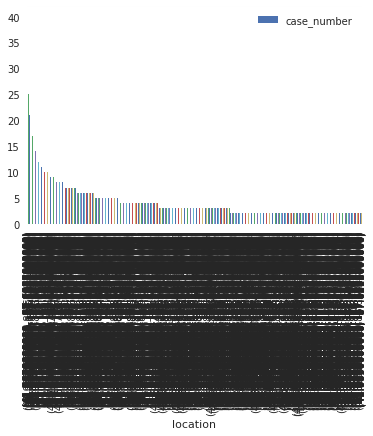

In [45]:
df5.plot(x='location', y='case_number', kind='bar')

Cant' see much from the chart. 
<br/>Anyway, this is the area with most crimes: https://goo.gl/maps/sG6bqFV9Xcm 
<br/>in my dataframe (<b>not</b> in Chicago - since I only took 10,000 rows from the > 1 M rows)
<br/>(after removing 6xzeros from both latitude and longitude)